In [53]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from pandas import Timestamp
import string
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup

from IPython.core.interactiveshell import InteractiveShell


In [54]:
df = pd.read_csv('lock.csv')
df.shape
df.head()

,Unnamed: 0,tweets,proc_tweets,sentiment_compound_polarity,sentiment_neutral,sentiment_pos,sentiment_negative,sentiment
0,4/9/2020 16:31,b'RT @BTsipa: Doing nightshift \xf0\x9f\x98\xa...,NaN,NaN,NaN,NaN,NaN,NaN
1,4/9/2020 16:30,"b""RT @JustinaBenson10: Madam couldn't take it ...",NaN,NaN,NaN,NaN,NaN,NaN
2,4/9/2020 16:30,b'RT @Mfundoyakhe_S: As the wife was going thr...,NaN,NaN,NaN,NaN,NaN,NaN
3,4/9/2020 16:30,"b""RT @MberiTakudzw: Pallo's work \xe2\x9c\x8c\...",NaN,NaN,NaN,NaN,NaN,NaN
4,4/9/2020 16:30,"b'""We do as he commands""\n#HumanityIsNotAVirus...",NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
print(df.tweets[500])

b'RT @99acresIndia: #RealEstateNews | Private equity investment in #RealEstate to decline in 2020 due to #Coronavirus pandemic! Read more: ht\xe2\x80\xa6'


In [56]:
df = pd.read_csv('lock.csv')

In [57]:
print(df.tweets[500])

b'RT @99acresIndia: #RealEstateNews | Private equity investment in #RealEstate to decline in 2020 due to #Coronavirus pandemic! Read more: ht\xe2\x80\xa6'


In [60]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [61]:
df["proc_tweets"] = np.vectorize(remove_pattern)(df["tweets"], "@[\w]*")

df["proc_tweets"] = np.vectorize(remove_pattern)(df["tweets"], "#[\w+]*")
#df["proc_tweet"] = np.vectorize(remove_pattern)(df["tweet"], "d[\w+]*")
df['proc_tweets'] = df['proc_tweets'].str.replace("[^a-zA-Z#]", " ")

df['proc_tweets'] = df['proc_tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [63]:
print(df.proc_tweets[500])

acresIndia Private equity investment decline pandemic Read more


In [62]:
print(df.proc_tweets[500])

acresIndia Private equity investment decline pandemic Read more


In [64]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

from nltk import tokenize

In [65]:

import nltk

In [66]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SRI\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [76]:
sid = SentimentIntensityAnalyzer()

In [91]:
df['sentiment_compound_polarity']=df.tweets.apply(lambda x:sid.polarity_scores(x)['compound'])
df['sentiment_neutral']=df.tweets.apply(lambda x:sid.polarity_scores(x)['neu'])
df['sentiment_negative']=df.tweets.apply(lambda x:sid.polarity_scores(x)['neg'])
df['sentiment_pos']=df.tweets.apply(lambda x:sid.polarity_scores(x)['pos'])

0.0


In [92]:
df.head(5)

,Unnamed: 0,tweets,proc_tweets,sentiment_compound_polarity,sentiment_neutral,sentiment_pos,sentiment_negative,sentiment
0,4/9/2020 16:31,b'RT @BTsipa: Doing nightshift \xf0\x9f\x98\xa...,BTsipa Doing nightshift https UtNU,0.0000,1.000,0.000,0.000,NaN
1,4/9/2020 16:30,"b""RT @JustinaBenson10: Madam couldn't take it ...",JustinaBenson Madam couldn take again Nigerian...,-0.5267,0.833,0.000,0.167,NaN
2,4/9/2020 16:30,b'RT @Mfundoyakhe_S: As the wife was going thr...,Mfundoyakhe wife going through chemotherapy se...,-0.0772,0.676,0.139,0.185,NaN
3,4/9/2020 16:30,"b""RT @MberiTakudzw: Pallo's work \xe2\x9c\x8c\...",MberiTakudzw Pallo work based Capetown also tr...,0.0000,1.000,0.000,0.000,NaN
4,4/9/2020 16:30,"b'""We do as he commands""\n#HumanityIsNotAVirus...",commands https kHuCrc,0.0000,1.000,0.000,0.000,NaN


In [94]:
df['sentiment']=''
df.loc[df.sentiment_compound_polarity>0,'sentiment']='POSITIVE'
df.loc[df.sentiment_compound_polarity==0,'sentiment']='NEUTRAL'
df.loc[df.sentiment_compound_polarity<0,'sentiment']='NEGATIVE'
df.head()

,Unnamed: 0,tweets,proc_tweets,sentiment_compound_polarity,sentiment_neutral,sentiment_pos,sentiment_negative,sentiment
0,4/9/2020 16:31,b'RT @BTsipa: Doing nightshift \xf0\x9f\x98\xa...,BTsipa Doing nightshift https UtNU,0.0000,1.000,0.000,0.000,NEUTRAL
1,4/9/2020 16:30,"b""RT @JustinaBenson10: Madam couldn't take it ...",JustinaBenson Madam couldn take again Nigerian...,-0.5267,0.833,0.000,0.167,NEGATIVE
2,4/9/2020 16:30,b'RT @Mfundoyakhe_S: As the wife was going thr...,Mfundoyakhe wife going through chemotherapy se...,-0.0772,0.676,0.139,0.185,NEGATIVE
3,4/9/2020 16:30,"b""RT @MberiTakudzw: Pallo's work \xe2\x9c\x8c\...",MberiTakudzw Pallo work based Capetown also tr...,0.0000,1.000,0.000,0.000,NEUTRAL
4,4/9/2020 16:30,"b'""We do as he commands""\n#HumanityIsNotAVirus...",commands https kHuCrc,0.0000,1.000,0.000,0.000,NEUTRAL


In [108]:
df.columns

Index(['Unnamed: 0', 'tweets', 'proc_tweets', 'sentiment_compound_polarity',
       'sentiment_neutral', 'sentiment_pos', 'sentiment_negative',
       'sentiment'],
      dtype='object')

In [99]:
df.shape
## 8 - heading in the csv file 33383 tweets

(33383, 8)

In [110]:
df.sentiment.value_counts()          ### no. of tweets in each class

POSITIVE    12713
NEGATIVE    10477
NEUTRAL     10193
Name: sentiment, dtype: int64

In [103]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33383 entries, 0 to 33382
Data columns (total 8 columns):
Unnamed: 0                     33383 non-null object
tweets                         33383 non-null object
proc_tweets                    33383 non-null object
sentiment_compound_polarity    33383 non-null float64
sentiment_neutral              33383 non-null float64
sentiment_pos                  33383 non-null float64
sentiment_negative             33383 non-null float64
sentiment                      33383 non-null object
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


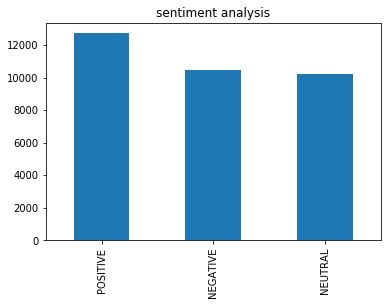

In [97]:
df.sentiment.value_counts().plot(kind='bar',title="sentiment analysis")